# To try out Instance Segmentation with Mask-RCNN, follow the steps below:

* In command prompt : git clone https://github.com/matterport/Mask_RCNN.git (clone the repo)
* Change to "Mask_RCNN" directory
* In command prompt : setup.py install (to install dependencies)
* Download model weights of [mask_rcnn_coco](https://github.com/matterport/Mask_RCNN/releases)

In [1]:
from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize
import cv2
import colorsys
import argparse
import imutils
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.


### Configuration

In [2]:
class SimpleConfig(Config):
    NAME = "coco_inf"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 81   #classes in COCO dataset

In [3]:
CLASS_NAMES = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

### Load Model & Configuration

In [4]:
config = SimpleConfig()
config.display()
model = modellib.MaskRCNN(mode="inference", config=config, model_dir=os.getcwd())
model.load_weights("mask_rcnn_coco.h5", by_name=True)


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

### Input image and predict masks of instances

In [5]:
image = cv2.imread("images/sample_pose_lockdown.png") #Change the input image to try out segmentation of a preferred pic.
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = imutils.resize(image, width=512)
# perform a forward pass of the network to obtain the results
print("[INFO] making predictions with Mask R-CNN...")
result = model.detect([image], verbose=1)

[INFO] making predictions with Mask R-CNN...
Processing 1 images
image                    shape: (288, 512, 3)         min:    0.00000  max:  238.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  113.30000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32



### Result

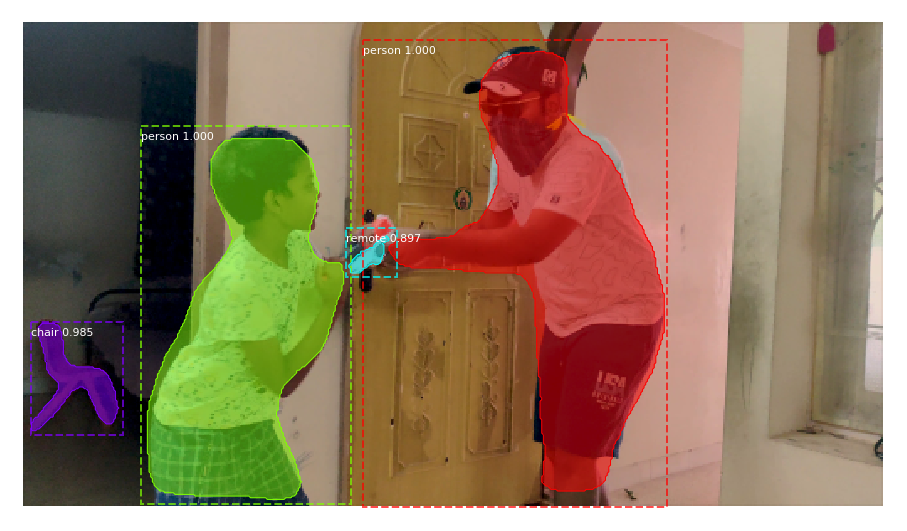

In [6]:
r1 = result[0]
visualize.display_instances(image, r1['rois'], r1['masks'],   r1['class_ids'], CLASS_NAMES, r1['scores'])